**Alumno:** César Emilio García Ávalos

**Actividad:** M4_AI2_Análisis Discriminante

In [759]:
library(readr)
library(tidyr)
library(dplyr)
library(MASS)
library(caret)
library(randomForest)

ruta <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/4.3_AD_ejercicio.csv"
datos <- read.csv(ruta, sep = ";")
summary(datos)

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

In [760]:
head(datos, 5)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [761]:
datos <- mutate(datos, quality = case_when(
    quality %in% c(3, 4) ~ "pobre",
    quality %in% c(5, 6) ~ "aceptable",
    quality %in% c(7, 8) ~ "bueno"
  ))
datos$quality <- factor(datos$quality, levels = c("pobre", "aceptable", "bueno"))

In [762]:
# Calcular la frecuencia de cada clase
frecuencia_clases <- table(datos$quality)
frecuencia_clases


    pobre aceptable     bueno 
       63      1319       217 

In [763]:
maxs <- apply(datos[,1:11], 2, max)
mins <- apply(datos[,1:11], 2, min)
dataset <- as.data.frame(scale(datos[,1:11], center = mins, scale = maxs - mins))
dataset <- cbind(dataset, quality = datos$quality)

In [764]:
index <- sample(1:nrow(dataset), round(nrow(dataset)*0.7),replace=FALSE)
x_train <- dataset[index,]
test <- dataset[-index,]

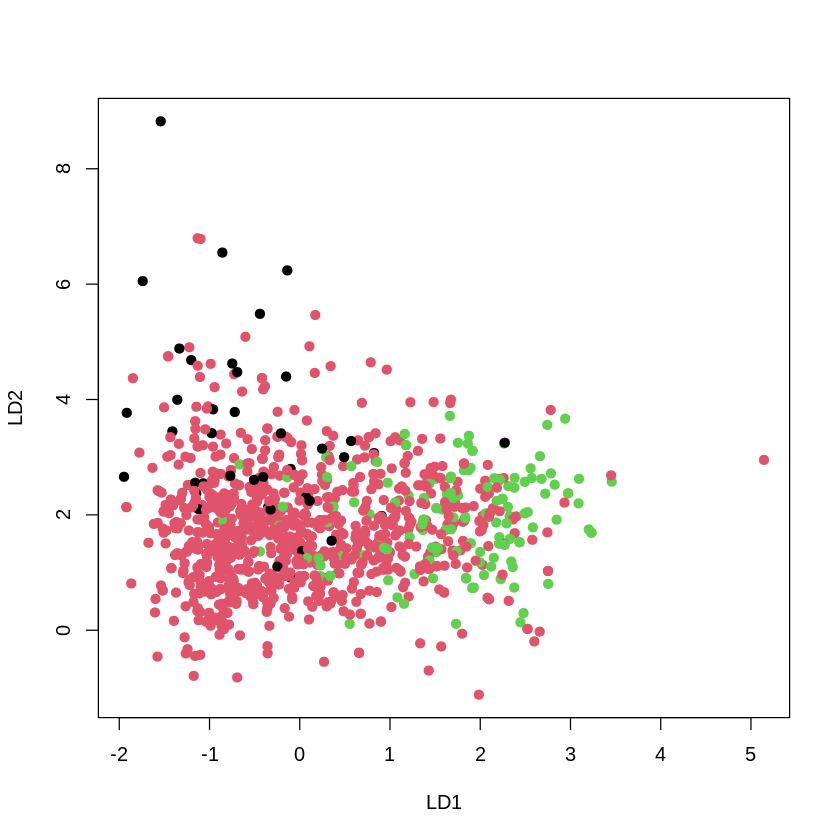

In [765]:
set.seed(123)
model <- lda(quality ~ ., data=x_train)
projected_data <- as.matrix(x_train[,1:11]) %*% model$scaling
plot(projected_data, col = x_train[,12], pch=19)

No se identifica una clara separación de las clases, estas se superponen, lo que puede indicar que el LDA no ha segmentado las observaciones de manera adecuada.

In [766]:
x_test <- test[, !(names(test) %in% c("quality"))]
model.results <- predict(model, x_test)
t = table(model.results$class, test$quality)
print(confusionMatrix(t))

Confusion Matrix and Statistics

           
            pobre aceptable bueno
  pobre         1         6     0
  aceptable    20       371    44
  bueno         1        14    23

Overall Statistics
                                         
               Accuracy : 0.8229         
                 95% CI : (0.7858, 0.856)
    No Information Rate : 0.8146         
    P-Value [Acc > NIR] : 0.3443         
                                         
                  Kappa : 0.2919         
                                         
 Mcnemar's Test P-Value : 2.432e-05      

Statistics by Class:

                     Class: pobre Class: aceptable Class: bueno
Sensitivity              0.045455           0.9488      0.34328
Specificity              0.986900           0.2809      0.96368
Pos Pred Value           0.142857           0.8529      0.60526
Neg Pred Value           0.955603           0.5556      0.90045
Prevalence               0.045833           0.8146      0.13958
Detection Rate

La sensitividad es baja respecto a la clasificación de las instancias que pertenecen a la clase minoritaria "pobre", además la especificidad es alta lo que indica que el modelo clasifica correctamente la mayoría de las instancias no "pobre". Aunque el modelo tiene un rendimiento aceptable para las clases mayoritarias ("aceptable" y "bueno"), tiene dificultades para acertar las observaciones de la clase minoritaria ("pobre"). Esto puede ser debido a un desequilibrio de clases en los datos.

In [767]:
new_x_train <- as.matrix(x_train[,1:11]) %*% model$scaling
new_x_train <- as.data.frame(new_x_train)
new_x_train$class <- x_train$quality
head(new_x_train)

,LD1,LD2,class
,<dbl>,<dbl>,<fct>
1175,-0.66774988,0.6853380,aceptable
752,-1.12768097,1.6967411,aceptable
495,1.70722179,1.8644135,aceptable
1070,0.08936967,2.1803830,aceptable
261,-0.31228019,0.7703215,aceptable
208,-1.03541188,1.3277891,aceptable


In [768]:
new_x_test <- as.matrix(x_test[,(1:11)]) %*% model$scaling
new_x_test <- as.data.frame(new_x_test)
head(new_x_test)

,LD1,LD2
,<dbl>,<dbl>
4,0.3447486,1.04178285
12,0.7277119,1.54802668
16,-1.1085631,-0.01026753
22,-0.6908795,0.50334881
28,0.1936846,0.86716164
30,-0.6869250,2.41853083


In [769]:
set.seed(123)
modfit.rf <- randomForest(class ~. , data= new_x_train)
predictions.rf <- predict(modfit.rf, new_x_test, type = "class")
t = table(predictions.rf, test$quality)
print(confusionMatrix(t))

Confusion Matrix and Statistics

              
predictions.rf pobre aceptable bueno
     pobre         1         5     0
     aceptable    20       363    39
     bueno         1        23    28

Overall Statistics
                                          
               Accuracy : 0.8167          
                 95% CI : (0.7791, 0.8503)
    No Information Rate : 0.8146          
    P-Value [Acc > NIR] : 0.481491        
                                          
                  Kappa : 0.3163          
                                          
 Mcnemar's Test P-Value : 0.002735        

Statistics by Class:

                     Class: pobre Class: aceptable Class: bueno
Sensitivity              0.045455           0.9284      0.41791
Specificity              0.989083           0.3371      0.94189
Pos Pred Value           0.166667           0.8602      0.53846
Neg Pred Value           0.955696           0.5172      0.90888
Prevalence               0.045833           0.8146    

El accuracy del modelo RF utilizando LDA para reducir dimensionalidad no difiere significativamente en comparación al modelo utilizando LDA directamente como clasificador (en las ejecuciones realizadas el accuracy del LDA es mayor que el RF con reducción de dimensionalidad con diferencia de un punto porcentual), por otra parte, al igual que el modelo LDA, el modelo RF tiene dificultad para acertar las observaciones de la clase minoritaria "pobre", el modelo tiende a clasificar "pobres" a las instancias que son en realidad "aceptables"

In [770]:
set.seed(123)
modfit.rf2 <- randomForest(quality ~. , data= x_train)
predictions.rf2 <- predict(modfit.rf2, x_test, type = "class")
t = table(predictions.rf2, test$quality)
print(confusionMatrix(t))

Confusion Matrix and Statistics

               
predictions.rf2 pobre aceptable bueno
      pobre         0         1     0
      aceptable    22       381    39
      bueno         0         9    28

Overall Statistics
                                          
               Accuracy : 0.8521          
                 95% CI : (0.8171, 0.8826)
    No Information Rate : 0.8146          
    P-Value [Acc > NIR] : 0.01788         
                                          
                  Kappa : 0.3812          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: pobre Class: aceptable Class: bueno
Sensitivity              0.000000           0.9744      0.41791
Specificity              0.997817           0.3146      0.97821
Pos Pred Value           0.000000           0.8620      0.75676
Neg Pred Value           0.954071           0.7368      0.91196
Prevalence               0.045833           0.814

El accuracy de este modelo es mejor que los modelos anteriores, sin embargo, persiste el problema respecto a la clasificación de la clase minoritaria "pobre", las instancias que son en realidad "aceptables" son clasificadas como "pobres"

Aunque ninguno de los tres modelos evaluados tiene un rendimiento óptimo en la clase minoritaria (los tres modelos tienen baja sensitividad para detectar instancias de la clase "pobre"), el último modelo proporciona una mayor precisión en la clasificación de instancias "aceptables" y "buenas" por lo tanto, la elección del modelo a utilizar sería el número 3